In [1]:
!pip install gensim nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 997.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

In [40]:
import nltk
from gensim.models import Word2Vec
import string
from urllib import request
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
import numpy as np

In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [34]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
text = response.read().decode("utf-8")

In [29]:
sentences = sent_tokenize(text)
processed_sentences = []

for sentence in sentences:
  words = word_tokenize(sentence.lower())
  words = [w for w in words if w.isalpha()]
  processed_sentences.append(words)


In [32]:
for sentence in processed_sentences:
  if "punishment" in sentence:
    print(sentence)

['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'crime', 'and', 'punishment', 'by', 'fyodor', 'dostoevsky', 'translated', 'by', 'constance', 'garnett', 'translator', 's', 'preface', 'a', 'few', 'words', 'about', 'dostoevsky', 'himself', 'may', 'help', 'the', 'english', 'reader', 'to', 'understand', 'his', 'work']
['all', 'his', 'other', 'gifts', 'came', 'to', 'him', 'from', 'nature', 'this', 'he', 'won', 'for', 'himself', 'and', 'through', 'it', 'he', 'became', 'crime', 'and', 'punishment', 'part', 'i', 'chapter', 'i', 'on', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'july', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'place', 'and', 'walked', 'slowly', 'as', 'though', 'in', 'hesitation', 'towards', 'bridge']
['surely', 'it', 'isn', 't', 'my', 'punishment', 'coming', 'upon', 'me']
['that', 'will', 'be', 'his', 'punishment', 'as', 'well', 'as', 'the', 'but', 'the', 'real', 'geniuses', 'asked', 'razumihin', 'frownin

In [25]:
model = Word2Vec(
    sentences = processed_sentences,
    vector_size = 500,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

In [17]:
model_skip_gram = Word2Vec(
    sentences = processed_sentences,
    vector_size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 1 # Skip gram
)

In [20]:
print(f"Vocab size: {len(model.wv)}")
print("Sample words from vocabulary:", list(model.wv.index_to_key[:20]))

Vocab size: 2969
Sample words from vocabulary: ['the', 'and', 'to', 'he', 'a', 'i', 'you', 'of', 'it', 'that', 'in', 'was', 'his', 'at', 'her', 'but', 'not', 's', 'with', 'she']


In [26]:
# Nearest neighbours
words = ["raskolnikov", "murder", "guilt", "police", "suffering", "money", "crime", "punishment"]

for word in words:
    if word in model.wv:
        print(f"\nTop 5 similar words to '{word}':")
        for w, score in model.wv.most_similar(word, topn=5):
            print(f"{w}: {score:.4f}")
    else:
        print(f"\n'{word}' not found in vocabulary.")


Top 5 similar words to 'raskolnikov':
perplexity: 0.9775
quickly: 0.9767
still: 0.9750
and: 0.9745
gazing: 0.9740

Top 5 similar words to 'murder':
hm: 0.9989
things: 0.9988
practical: 0.9987
truth: 0.9986
ashamed: 0.9986

'guilt' not found in vocabulary.

Top 5 similar words to 'police':
ladies: 0.9985
six: 0.9984
return: 0.9984
murdered: 0.9983
dinner: 0.9983

Top 5 similar words to 'suffering':
peculiar: 0.9994
appearance: 0.9993
excitement: 0.9992
tall: 0.9991
covered: 0.9991

Top 5 similar words to 'money':
wait: 0.9983
anyway: 0.9981
beforehand: 0.9978
trouble: 0.9978
remain: 0.9975

Top 5 similar words to 'crime':
best: 0.9993
evidence: 0.9991
reading: 0.9991
sometimes: 0.9991
contrary: 0.9991

'punishment' not found in vocabulary.


In [30]:
# Word analogies
print("\nAnalogy: man - woman + sonia = ?")
try:
    result = model.wv.most_similar(positive=["sonia", "man"], negative=["woman"], topn=5)
    for word, score in result:
        print(f"{word}: {score:.4f}")
except KeyError as e:
    print(e)


Analogy: man - woman + sonia = ?
experienced: 0.9855
proud: 0.9852
sooner: 0.9852
great: 0.9847
wine: 0.9845


In [33]:
# Similarity
pairs = [("raskolnikov", "sonia"), ("murder", "crime")]

for w1, w2 in pairs:
    if w1 in model.wv and w2 in model.wv:
        sim = model.wv.similarity(w1, w2)
        print(f"Similarity({w1}, {w2}): {sim:.4f}")
    else:
        print(f"One of the words ({w1}, {w2}) not in vocab.")


Similarity(raskolnikov, sonia): 0.9722
Similarity(murder, crime): 0.9967


In [41]:
top_n = 200
words = list(model.wv.index_to_key[:top_n])
vectors = np.array([model.wv[word] for word in words])

tsne_reducer = TSNE(n_components=2, random_state = 42, perplexity = 30, n_iter = 1000)
reduced_tsne = tsne_reducer.fit_transform(vectors)

pca_reducer = PCA(n_components = 2)
reduced_PCA = pca_reducer.fit_transform(vectors)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


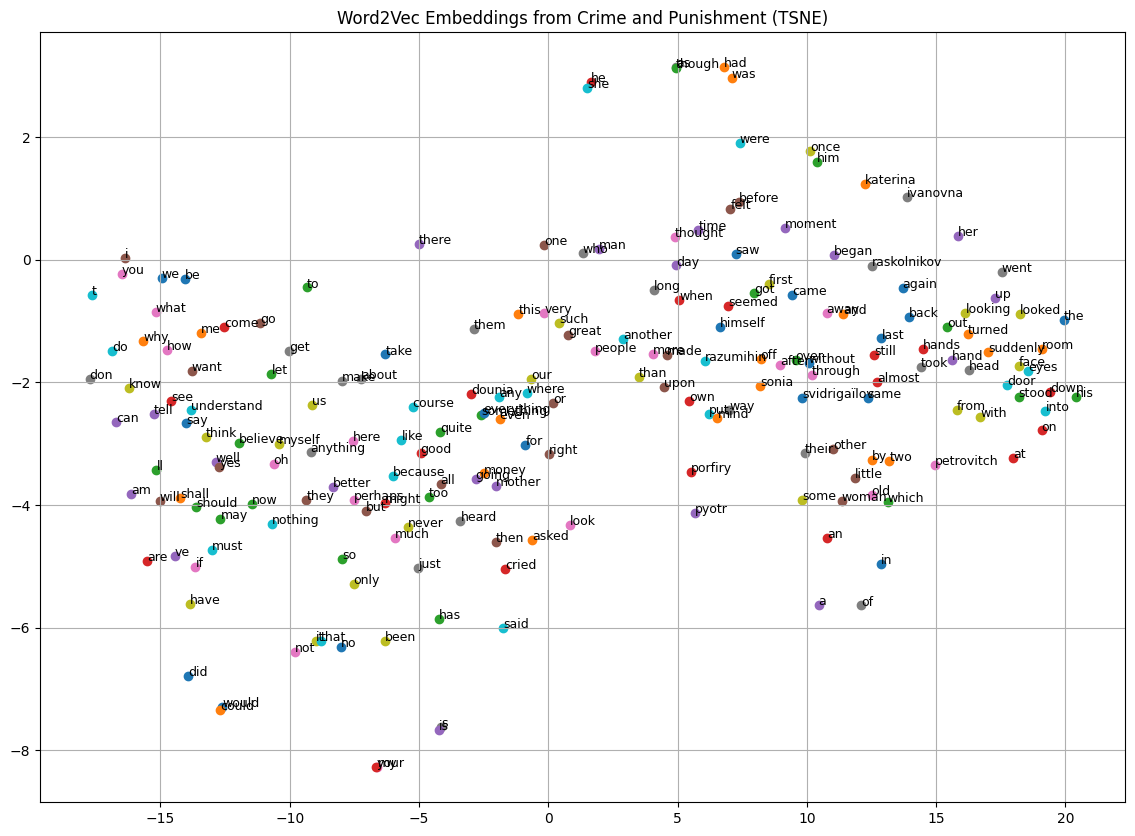

In [44]:
plt.figure(figsize=(14, 10))
for i, word in enumerate(words):
    x, y = reduced_tsne[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)

plt.title(f"Word2Vec Embeddings from Crime and Punishment (TSNE)")
plt.grid(True)
plt.show()


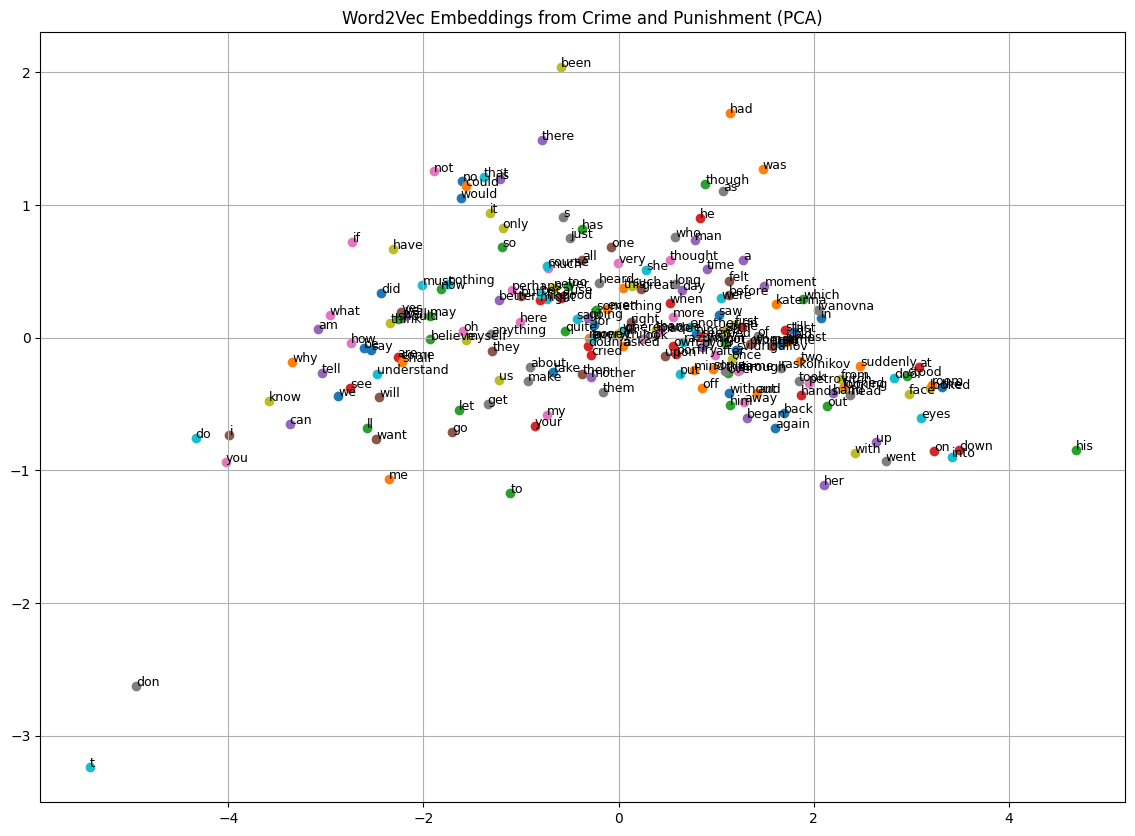

In [45]:
plt.figure(figsize=(14, 10))
for i, word in enumerate(words):
    x, y = reduced_PCA[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)

plt.title(f"Word2Vec Embeddings from Crime and Punishment (PCA)")
plt.grid(True)
plt.show()


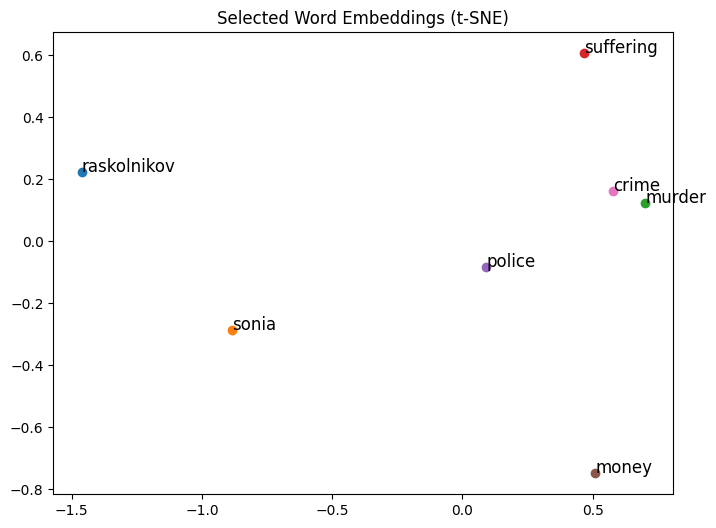

In [50]:
keywords = ["raskolnikov", "sonia", "murder", "suffering", "police", "money", "crime"]
vecs = np.array([model.wv[word] for word in keywords])
reduced = PCA(n_components=2).fit_transform(vecs)

plt.figure(figsize=(8, 6))
for i, word in enumerate(keywords):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=12)
plt.title("Selected Word Embeddings (t-SNE)")
plt.show()
